# TODOs

- write the about model section
- link the application note encoding explanation when we show the encoded matrix below
- serialization of the predictor should be more self-contained, but this needs to be changed in QSPRPred first
- add citation for NSGA-II

# About the Model

TODO (advantages, disadvantages, some pictures from the application note, ...)

## Data Preparation

In this tutorial, we assume you already extracted the required data and models with the download utility as described in the [README](README.md) file. They should be located in the `data` directory in the current folder:

In [1]:
import os

os.listdir('data')

['models', 'sets', 'logs']

We will only be preparing a fine-tuned model in this tutorial so we just need one data set that closely relates to our target of interest, which is the adenosine A2A receptor (A2AR) in this case. Data about ligands extracted from the [Papyrus](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-022-00672-x) dataset is saved in the following folder:

In [3]:
DATASETS_PATH = 'data/datasets/'

os.listdir(DATASETS_PATH)

['.Papyrus', 'A2AR_LIGANDS.tsv']

Lets take a look at the data set file itself:

In [4]:
import pandas as pd

df = pd.read_csv(f'{DATASETS_PATH}/A2AR_LIGANDS.tsv', sep='\t', header=0, na_values=('NA', 'nan', 'NaN'))
df

,Activity_ID,Quality,source,CID,SMILES,connectivity,InChIKey,InChI,InChI_AuxInfo,target_id,...,type_other,Activity_class,relation,pchembl_value,pchembl_value_Mean,pchembl_value_StdDev,pchembl_value_SEM,pchembl_value_N,pchembl_value_Median,pchembl_value_MAD
0,AACWUFIIMOHGSO_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.91968,Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...,AACWUFIIMOHGSO,AACWUFIIMOHGSO-UHFFFAOYSA-N,InChI=1S/C19H24N6O2/c1-12-10-13(2)25(23-12)17-...,"""AuxInfo=1/1/N:1,26,22,14,15,20,19,11,12,27,6,...",P29274_WT,...,NaN,NaN,=,8.68;8.68;8.68;8.68,8.6800,0.000000,0.000000,4.0,8.6800,0.0000
1,AAEYTMMNWWKSKZ_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.131451,Nc1c(C(=O)Nc2ccc([N+](=O)[O-])cc2)sc2c1cc1CCCC...,AAEYTMMNWWKSKZ,AAEYTMMNWWKSKZ-UHFFFAOYSA-N,InChI=1S/C18H16N4O3S/c19-15-13-9-10-3-1-2-4-14...,"""AuxInfo=1/1/N:22,23,21,24,8,15,9,14,19,20,7,1...",P29274_WT,...,NaN,NaN,=,4.82;4.82,4.8200,0.000000,0.000000,2.0,4.8200,0.0000
2,AAGFKZWKWAMJNP_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.100375,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,AAGFKZWKWAMJNP,AAGFKZWKWAMJNP-UHFFFAOYSA-N,InChI=1S/C21H14N6O2/c28-20(14-8-3-1-4-9-14)24-...,"""AuxInfo=1/1/N:27,19,26,28,18,20,9,25,29,17,21...",P29274_WT,...,NaN,NaN,=,5.65;5.65,5.6500,0.000000,0.000000,2.0,5.6500,0.0000
3,AAJLGNFYNMJGSY_on_P29274_WT,High,ExCAPE-DB,9586623,NC(=NC(=O)Cn1c(O)c2CCCCc2c1O)Nc1nc2c(cccc2)s1,AAJLGNFYNMJGSY,AAJLGNFYNMJGSY-UHFFFAOYSA-N,InChI=1S/C18H19N5O3S/c19-17(22-18-20-12-7-3-4-...,"""AuxInfo=1/1/N:12,13,25,24,11,14,26,23,6,10,15...",P29274_WT,...,NaN,NaN,=,5.3;5.3,5.3000,0.000000,0.000000,2.0,5.3000,0.0000
4,AANUKDYJZPKTKN_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.123484;45483959;ChEMBL31.com...,CNC(=O)C12CC1C(n1cnc3c1nc(C#CCCCCC(=O)OC)nc3NC...,AANUKDYJZPKTKN,AANUKDYJZPKTKN-UHFFFAOYSA-N,InChI=1S/C28H31ClN6O5/c1-30-27(39)28-13-18(28)...,"""AuxInfo=1/1/N:1,25,18,19,17,20,35,36,34,16,21...",P29274_WT,...,NaN,NaN,=,5.45;5.451;5.45;5.451;5.45;5.451;5.45;5.451,5.4505,0.000535,0.000189,8.0,5.4505,0.0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,ZYXGKENMDDPQIE_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.399078,CNc1ncc(C(=O)NCc2ccc(OC)cc2)c2nc(-c3ccco3)nn12,ZYXGKENMDDPQIE,ZYXGKENMDDPQIE-UHFFFAOYSA-N,InChI=1S/C19H18N6O3/c1-20-19-22-11-14(17-23-16...,"""AuxInfo=1/1/N:1,16,24,23,12,18,13,17,25,10,5,...",P29274_WT,...,NaN,NaN,=,7.09;7.09,7.0900,0.000000,0.000000,2.0,7.0900,0.0000
4292,ZYZWFDVXMLCIOU_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.94689;10132473;ChEMBL31.comp...,Nc1nc(-c2ccco2)c2ncn(C(=O)NCCc3ccccc3)c2n1,ZYZWFDVXMLCIOU,ZYZWFDVXMLCIOU-UHFFFAOYSA-N,InChI=1S/C18H16N6O2/c19-17-22-14(13-7-4-10-26-...,"""AuxInfo=1/1/N:22,21,23,7,20,24,6,18,17,8,12,1...",P29274_WT,...,NaN,NaN,=,8.22;8.222;8.22;8.222;8.22;8.222;8.22;8.222,8.2210,0.001069,0.000378,8.0,8.2210,0.0010
4293,ZZBZWSYDXUPJCT_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.131461,Nc1nc(Nc2ccc(F)cc2)nc(CSc2nnc(N)s2)n1,ZZBZWSYDXUPJCT,ZZBZWSYDXUPJCT-UHFFFAOYSA-N,InChI=1S/C12H11FN8S2/c13-6-1-3-7(4-2-6)16-11-1...,"""AuxInfo=1/1/N:8,11,7,12,15,9,6,14,2,20,4,17,1...",P29274_WT,...,NaN,NaN,=,4.89;4.89,4.8900,0.000000,0.000000,2.0,4.8900,0.0000
4294,ZZMIPZLRKFEGIA_on_P29274_WT,High,ExCAPE-DB,71563052;ChEMBL31.compound.202018;71563052;ChE...,CCCOc1ccc(C=Cc2cc3c(c(=O)n(C)c(=O)n3C)n2C)cc1,ZZMIPZLRKFEGIA,ZZMIPZLRKFEGIA-UHFFFAOYSA-N,InChI=1S/C20H23N3O3/c1-5-12-26-16-10-7-14(8-11...,"""AuxInfo=1/0/N:1,24,22,18,2,9,7,25,10,6,26,3,1...",P29274_WT,...,NaN,NaN,=,6.513;6.51;6.513;6.51;6.513;6.51;6.513;6.51,6.5115,0.001604,0.000567,8.0,6.5115,0.0015


At this point, we are not really concerned about any of the columns, except the `SMILES` column, which contains structures of molecules experimentally tested for any sort of activity on A2AR. To speed up calculations, we will only extract small random portion of all molecules, but in a real project you should of course use all of them.

In [5]:
N_MOLS = 100

smiles = df.SMILES.sample(N_MOLS)

These will be our molecules of interest further in the tutorial. They will be used for the pretrained model we have also downloaded previously. We just need to preprocess and encode the structures. Note, that if you are aiming at pretraining your own model the procedure is the same, you just need to use a more general data set (i.e. the whole ChEMBL database).

### Note About Logging

Because we will be potentially processing a lot of data, it might be a good idea to redirect logging outputs to a seperate file so that we keep this notebook clean. DrugEx is using a package-wide logger (available as `drugex.logs.logger`). We can configure it with the standard Python `logging` package. For this tutorial, we already created a method in the [`utils.py`](utils.py) module. It creates a log file for us that will be saved in `data/logs/`:

In [6]:
from utils import initLogger

initLogger('datasets.log')

### Standardization

The first step in our efforts will be the standardization of the data. That is easily accomplised with the built-in `Standardization` processor that we can apply to our compounds:

In [7]:
from drugex.data.processing import Standardization

N_PROC = 4 # standardization can use multiple CPUs
standardizer = Standardization(n_proc=N_PROC)
smiles = standardizer.apply(smiles)

len(smiles)

Standardizing molecules (batch processing):   0%|          | 0/1 [00:00<?, ?it/s]

100

The standardizer also handles parsing errors for us so the resulting number of molecules can be reduced in comparison to the original data. `Standardization` also allows to change the standardization method by supplying a custom standardizer function (i.e. `Standardization(standardizer=my_fucntion)`). You can find more details in the [documentation](https://cddleiden.github.io/DrugEx/docs/api/drugex.data.html?highlight=standardization#drugex.data.processing.Standardization).

The standardizer does not handle duplicates so we handle them now. The standardizer should output canonical SMILES and, thus, filtering out duplicates by creating a `set` should suffice:

In [8]:
smiles = set(smiles)
len(smiles)

100

### Fragmentation & Encoding

The input of the transformer are the fragments that the molecules of interest are made up of while the molcules of interest themselves are the output. The model then learns to create new valid molecules from the given input fragments. In order to convert the SMILES strings to the encoded model input, we have to generate a so called corpus data set that defines the underlying chemistry or grammar rules for the model. You can use the `FragmentCorpusEncoder` processor in combination with the `GraphFragmentEncoder` to generate the data set for this model:

*Note: The term 'corpus' comes from NLP (Natural Language Processing) and was originally used in DrugEx v1 to describe the tokenized SMILES input for the recurrent neural network often used in NLP to represent textual data. We still use the term here for historical reasons even though the graph-based model is a very different type of model.*

In [9]:
from drugex.data.fragments import FragmentCorpusEncoder
from drugex.data.fragments import GraphFragmentEncoder, FragmentPairsSplitter
from drugex.molecules.converters.fragmenters import Fragmenter
from drugex.data.corpus.vocabulary import VocGraph

encoder = FragmentCorpusEncoder(
    fragmenter=Fragmenter(4, 4, 'brics'), # handles how fragment-molecule pairs are created
    encoder=GraphFragmentEncoder(
        VocGraph(n_frags=4) # encoder uses the graph vocabulary to create the graph matrix from the created fragment-molecule pairs
    ),
    pairs_splitter=FragmentPairsSplitter(0.1, 100), # in this instance, we also use a splitter to divide the fragment-molecule pairs into a test set and training set
    n_proc=N_PROC # we can again run these actions in parallel
)

When we have defined the encoder (basically a template for data processing), we can just apply it on our data to start encoding (see below). There are two operations involved in this process: 

1. **Fragmentation** - Determined by the `Fragmenter`, each input molecule is split into fragment-molecule pairs that will form one sample for the model. Depending on the splitting strategy (as determined by `FragmentPairsSplitter`), these pairs are divided into two or more sets. In this instance using the default settings, we collect two data sets in total:

    1. **test set** - The set of fragment-molecule pairs used for validation after an epoch of training. Maximum size of this test set is set with `FragmentPairsSplitter`, in this case at most 100 fragment-molecule pairs, but at least 10% of the original data.
    2. **trainining set** - It contains all fragment-molecule combinations not selected for the *test set*.

2. **Encoding** - This step is handled by the `GraphFragmentEncoder`, which is an implementation of `FragmentEncoder` that is specific to the graph-based model. Using the `VocGraph` vocabulary, it encodes each fragment-molecule pair in the data sets above to a representation understood by the model. This represenation is saved to the resulting `.tsv` files (one per each set after splitting). These files form the `GraphDataSet` and are loaded to the model via a PyTorch `DataLoader`.

We initialize the `GraphFragDataSet` instances first with the names of the associated `.tsv` files:

In [10]:
from drugex.data.datasets import GraphFragDataSet
import os

# create a dedicated directory for our graph data set files
DATASETS_ENCODED_PATH = f"{DATASETS_PATH}/encoded/graph"
if not os.path.exists(DATASETS_ENCODED_PATH):
    os.makedirs(DATASETS_ENCODED_PATH)

# create empty data sets (we have to specify a path to a file where the data set will be saved)
train = GraphFragDataSet(f"{DATASETS_ENCODED_PATH}/A2AR_train.tsv", rewrite=True)
test = GraphFragDataSet(f"{DATASETS_ENCODED_PATH}/A2AR_test.tsv", rewrite=True)

Now, empty data sets are initialized and if any file already exists it will be overwritten (as set by `rewrite=True`). 

We can finally run the encoder. We pass our data sets as `encodingCollectors`, which means only the results of the second step described above will be saved:

In [11]:
# apply the encoder and collect data (test data is collected first)
encoder.apply(list(smiles), encodingCollectors=[test, train])

Creating fragment-molecule pairs (batch processing):   0%|          | 0/1 [00:00<?, ?it/s]

Encoding fragment-molecule pairs. (batch processing):   0%|          | 0/1 [00:00<?, ?it/s]

Encoding fragment-molecule pairs. (batch processing):   0%|          | 0/1 [00:00<?, ?it/s]

It is possible some molecules still failed to parse so you can observe this in the logfile to make sure some important patterns were not missed. You can now also check that the appropriate files were indeed created in the `data/datasets/encoded/graph/` folder. 

We can easily associate `GraphFragDataSet` instances with these files if we need them again (note that the `rewrite` flag is off by default so the data is not cleared in this case):

In [13]:
# load only the smaller test set data
test_from_file = GraphFragDataSet(f'{DATASETS_ENCODED_PATH}/A2AR_test.tsv')

# we can check the output by converting the encoded data set to a pandas DataFrame
pd.DataFrame(test_from_file.getData())

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,1,0,0,0,1,5,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,18,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,18,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,11,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,5,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,0,0,0,1,11,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
72,1,0,0,0,1,5,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
73,1,0,0,0,1,18,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
74,1,0,0,0,1,5,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
train.getVocPath()

'data/datasets//encoded/graph/A2AR_train.tsv.vocab'

In [15]:
test.getVocPath()

'data/datasets//encoded/graph/A2AR_test.tsv.vocab'

Specifying a vocabulary is required by the model during training and we can easily reacreate it from these files so it is a good practice to keep these files around when initializing models, which we will see in the next section.

## Finetuning

The pretrained model is a model that usually captures general chemistry rules and as such is best trained on a diverse set of molecules. However, in drug discovery we usually want to bias such a model to a more focused area of chemical space, which is what happens during finetuning. In this tutorial, we will use the finetuning data set we just created to bias the model we have downloaded to:

In [17]:
MODELS_PR_PATH = 'data/models/pretrained/graph-trans/'

os.listdir(MODELS_PR_PATH)

['Papyrus05.5_graph_trans_PT']

This model is pretrained on the whole Papyrus data set `05.5`. The folder contains some metadata about the model, but today we are only intersted in the files with the `.pkg` and `.vocab` extensions:

In [18]:
MODEL_FILE_PR = f'{MODELS_PR_PATH}/Papyrus05.5_graph_trans_PT/Papyrus05.5_graph_trans_PT.pkg'
VOCAB_FILE_PR = f'{MODELS_PR_PATH}/Papyrus05.5_graph_trans_PT/Papyrus05.5_graph_trans_PT.vocab'

We can load the vocabulary and the model itself as follows:

In [19]:
from drugex.data.corpus.vocabulary import VocGraph

vocabulary = VocGraph.fromFile(VOCAB_FILE_PR)
vocabulary

In [20]:
from drugex.training.generators import GraphTransformer

GPUS = [0]

pretrained = GraphTransformer(voc_trg=vocabulary, use_gpus=GPUS) # attach this model to only the first GPU, but more can be specified
pretrained.loadStatesFromFile(MODEL_FILE_PR)

### Testing the Pretrained Generator

To test the model, we can sample some SMILES from it. The model has a convenience method (`sample_smiles`) that takes SMILES strings as input, fragments them, and generates the given number of molecules from the extracted fragments. This makes the generated molecules bound to contain these fragments:

In [21]:
inputs = [
    "c1ccncc1CC2CC2", # pyridine ring and cyclopropane
]

In the `utils` package, we have defined the `smilesToGrid` function that we can use to take a quick look at our input:

In [24]:
from utils import smilesToGrid

smilesToGrid(inputs)

MolGridWidget()

Finally, lets do the sampling itself:

In [25]:
generated = pretrained.generate(inputs, num_samples=30)

Standardizing molecules (batch processing):   0%|          | 0/1 [00:00<?, ?it/s]

Creating fragment-molecule pairs (batch processing):   0%|          | 0/1 [00:00<?, ?it/s]

Encoding fragment-molecule pairs. (batch processing):   0%|          | 0/1 [00:00<?, ?it/s]

Generating molecules:   0%|          | 0/30 [00:00<?, ?it/s]

Therefore, we have generated 30 random molecules that will contain either the pyridine ring, cyclopropane ring or both:

In [26]:
smilesToGrid(generated.SMILES, num_samples=30)

MolGridWidget()

And here are the incorporated fragments for each of them above:

In [27]:
smilesToGrid(generated.Frags, num_samples=30)

MolGridWidget()

But lets get to our original task, which is finetuning this model to generate compounds more similar to compounds explored in relation to A2AR. All we need to do is just start fitting our model with the data set we created above:

In [71]:
from drugex.training.monitors import FileMonitor
import pandas as pd

N_EPOCHS = 3 # set this to a higher number to see more significant effect
MODELS_FT_PATH = 'data/models/finetuned/graph'

# monitor manages serialization of models after each epoch and tracks training
monitor = FileMonitor(
    f'{MODELS_FT_PATH}/A2AR_FT', 
    verbose=True
)

# model fitting itself
pretrained.fit(
    train.asDataLoader(128), # create the data loader and specify the batch size
    test.asDataLoader(128), 
    epochs=3, # only 3 epochs to make things faster
    monitor=monitor
)

print("Finetuning done.")

Fitting model:   0%|          | 0/3 [00:00<?, ?it/s]

Iterating over training batches:   0%|          | 0/6 [00:00<?, ?it/s]

Iterating over validation batches:   0%|          | 0/1 [00:00<?, ?it/s]

Iterating over training batches:   0%|          | 0/6 [00:00<?, ?it/s]

Iterating over validation batches:   0%|          | 0/1 [00:00<?, ?it/s]

Iterating over training batches:   0%|          | 0/6 [00:00<?, ?it/s]

Iterating over validation batches:   0%|          | 0/1 [00:00<?, ?it/s]

Finetuning done.


If you want to follow the training progress, you can periodically check the `jupyter/models/finetuned/graph/chembl_ligand_fit.log` file that is created by the `FileMonitor` along with other files and also the states of the best performing model: 

In [29]:
os.listdir(MODELS_FT_PATH)

['A2AR_FT_fit.tsv', 'A2AR_FT_smiles.tsv', 'A2AR_FT_fit.log', 'A2AR_FT.pkg']

The `FileMonitor` is useful when you want to analyze the data generating during training later. You can load these files easily as pandas data frames:

In [30]:
# smiles generated at each epoch from the validation set and the input fragment(s) used to generate each
df_smiles = pd.read_csv(f'{MODELS_FT_PATH}/A2AR_FT_smiles.tsv', sep='\t')
df_smiles.head()

,SMILES,Valid,Desire,Frags,Epoch
0,Cc1ccc(C(=O)c2ccc(NC(=O)c3ccc(F)cc3)cc2Cl)cc1[...,1.0,1.0,C=O.Clc1ccccc1,1
1,COc1ccc(COCc2cc3nc(NCCN)nc(-c4nc(C(F)(F)F)cs4)...,1.0,1.0,CC.c1cscn1.c1ncc2sccc2n1,1
2,Cc1csc(NC(=O)CSC(=O)CCCc2cccc3c(=O)cc(N4CCOCC4...,1.0,1.0,CCC.Cc1cscn1.O=c1ccoc2ccccc12,1
3,CCOc1ccc(Cl)c(NC(=O)C2C(C)C3CCC2(C)C3(C)C)c1Cl,1.0,1.0,Clc1cccc(Cl)c1,1
4,Cn1c(=O)c2c(nc3n2CCN(NCc2ccccc2Cl)C3)n(C)c1=O,1.0,1.0,Clc1ccccc1.Cn1c(=O)c2c(nc3n2CCNC3)n(C)c1=O,1


In [64]:
# training summary with mean training loss and validation loss
df_info = pd.read_csv(f'{MODELS_FT_PATH}/A2AR_FT_fit.tsv', sep='\t')
df_info

,epoch,loss_train,loss_valid,valid_ratio,unique_ratio,desire_ratio,mean_train_loss
0,1,NaN,0.400104,1.0,NaN,1.0,0.413162
1,2,NaN,0.401029,1.0,NaN,1.0,0.406871
2,3,NaN,0.402145,1.0,NaN,1.0,0.397093


<AxesSubplot:xlabel='epoch'>

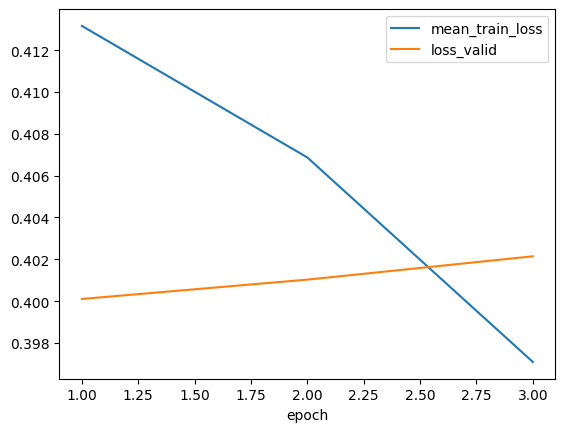

In [73]:
df_info[['mean_train_loss', 'loss_valid', 'epoch']].plot.line(x='epoch')

Depending on how long the model was trained, we should start noticing changes in the generated structures for our input data:

In [72]:
generated = pretrained.generate(inputs, num_samples=30)
smilesToGrid(generated.SMILES)

Standardizing molecules (batch processing):   0%|          | 0/1 [00:00<?, ?it/s]

Creating fragment-molecule pairs (batch processing):   0%|          | 0/1 [00:00<?, ?it/s]

Encoding fragment-molecule pairs. (batch processing):   0%|          | 0/1 [00:00<?, ?it/s]

Generating molecules:   0%|          | 0/30 [00:00<?, ?it/s]

MolGridWidget()

You will also find the serialized best model states among the output files (`A2AR_FT.pkg`):

In [34]:
os.listdir(MODELS_FT_PATH)

['A2AR_FT_fit.tsv', 'A2AR_FT_smiles.tsv', 'A2AR_FT_fit.log', 'A2AR_FT.pkg']

You can use this file to initialize the finetuned model once again to continue training or use it in another session.

The monitor also directly enables us to get the best model's states that we could use for initialization of a new instance as well:

In [35]:
other_model = GraphTransformer(voc_trg=vocabulary)
other_model.load_state_dict(monitor.getModel())

<All keys matched successfully>

For consistency, we will also now save the used vocabulary with the model so that we can always initialize it exactly the way we did during finetuning:

In [36]:
vocabulary.toFile(f'{MODELS_FT_PATH}/A2AR_FT.vocab')

Pretraining of a model from scartch works exactly the same way as finetuning, except for the fact that there is no  initial dictionary of weights to load with `loadStatesFromFile`.

## Reinforment Learning with Multi-Objective Optimization

In this last part of the tutorial, we review some of the most important scoring functions and optimization strategies on a simple example, which will be focused on searching for interesting new active compounds for A2AR. In order to do that, we will focus on optimizing two objectives:

1. Use a QSAR model to give reward based on predicted activity on A2AR 
2. [Synthetic Accessibility Score (SAScore)](https://jcheminf.biomedcentral.com/articles/10.1186/1758-2946-1-8) to increase synthetic accessibility of the generated molecules. 

### Specifying the Objectives

#### The QSAR Model

The QSAR model that we will use for A2AR activity predictions was already built for us with the [QSPRPred](https://github.com/CDDLeiden/QSPRPred) package and can simply be loaded as a `Predictor`. This object represents a random forest classifier model that returns probability of a compound to be a strong A2AR antagonist:

In [42]:
from qsprpred.scorers.predictor import Predictor

predictor = Predictor.fromFile(
    'data/models/qsar/', 
    'RandomForestClassifier', 
    'pchembl_value_Median', 
    type='CLS', 
    name='A2AR',
    scale=False
)

This is all it takes in this case, but you are not required to use the `QSPRPred` package to create your models. In fact, you can create any scoring function by implementing the `drugex.training.interfaces.Scorer` interface. Here is a simple dummy example:

In [43]:
from drugex.training.scorers.interfaces import Scorer

class ModelScorer(Scorer):
    
    def __init__(self, *args, **kwargs):
        super().__init__()
        pass
    
    def getScores(self, mols, frags=None):
        """
        Processes molecules and returns a score for each (i.e. a QSAR model prediction).
        """
        
        return [0] * len(mols) # just return zero for all molecules for the sake of example
    
    def getKey(self):
        """
        Unique Identifier among all the scoring functions used in a single environment.
        """
        
        return "ScorerName"

However, in this tutorial the scorer is already created for us so we can already test it by making predictions for some sample A2AR antagonists:

In [44]:
sample_inputs = [
    'CN1C=NC2=C1C(=O)N(C(=O)N2C)C', # caffeine
    'c1ccccc1CCN1N=CC2=C1N=C(N)N3C2=NC(C4=CC=CO4)=N3' # SCH-58261 (50x more selective to A2A than caffeine)
]

smilesToGrid(sample_inputs)

MolGridWidget()

In [45]:
predictor.getScores(sample_inputs)

/home/linde/.conda/envs/drugex_new_new/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0.4  , 0.996])

Here prediction gives back a value between 0 and 1 indicating the probability that the molecule is active on A2AR. Even though caffeine is an A2AR antagonist, it [does not bind it with high affinity](https://doi.org/10.1016/j.bmcl.2012.10.112), but SCH-58261 on the other hand does. Thus, our model only gives the former a moderate score in this case since it is trained to recognize stronger ligands of A2AR than caffeine alone.

#### Syntehtic Accessibility Score (SAScore)

It is time to define the second objective, which is the SAScore. This score is already available as a built-in scorer in DrugEx and can be easily imported like so:

In [46]:
from drugex.training.scorers.properties import Property

sascore = Property(
    "SA"
)

### Applying Score Modifiers

Since objectives are often on different scales and it is not clear to the optimization algorithm whether a decrease or an increase in objective indicates positive or negative reward for the model, the objectives often need to be scaled and modified to reflect out notion of desirable values for the scorer. This is done with so called modifiers, which are functions that do just that. For example, the `ClippedScore` modifier can be defined for the first objective as follows:

<AxesSubplot:xlabel='Original Score'>

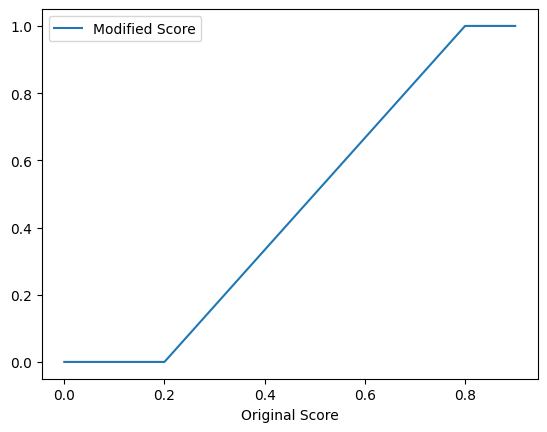

In [47]:
import numpy as np
import pandas as pd
from drugex.training.scorers.modifiers import ClippedScore

def depict_modifier(modifier, min_value=0, max_value=1, step=0.1):
    vals = np.arange(min_value, max_value, step)
    scores = [(x, modifier(x)) for x in vals] # get the A1R modifier for inactivity (the lower the activity, the higher the reward)
    scores = pd.DataFrame(scores, columns=['Original Score', 'Modified Score'])
    return scores.plot.line(x = 'Original Score', y = 'Modified Score')


predictor_modifier = ClippedScore(lower_x=0.2, upper_x=0.8)
depict_modifier(predictor_modifier)

As we can see, this modifier converts the QSAR model predictions of 0.2 and less to 0 and predictions of 0.8 and higher to 1. Since the optimization problems in DrugEx are forumalted as maximazations, this will make the algorithm consider any compounds predicted with probablity of 0.8 and above and 100% satisfactory and vice versa.

For the SAScore, we can use the same modifier function, but with slightly different parameters:

<AxesSubplot:xlabel='Original Score'>

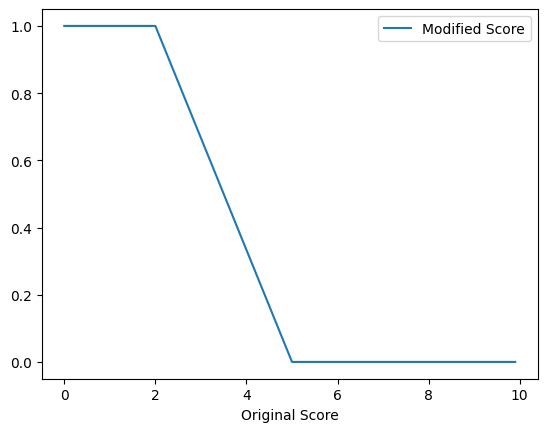

In [48]:
sascore_modifier = ClippedScore(lower_x=5, upper_x=2)
depict_modifier(sascore_modifier, min_value=0, max_value=10)

The SAScore is a score that can go from 0 to infinity and, thus, we have to reflect that in our modifier as well. In this case, we decided that any compounds with SAScore of 5 and higher are deemed undesirable and will score 0.

Lastly, we just need to remember to attach these modifiers to our scoring functions:

In [49]:
predictor.setModifier(predictor_modifier)
sascore.setModifier(sascore_modifier)

### Creating the Scoring Environment

Now, all that is left is to define the DrugEx environment itself by coupling the scoring functions together and specifying the reward scheme:

In [50]:
from drugex.training.environment import DrugExEnvironment
from drugex.training.rewards import ParetoCrowdingDistance

scorers = [
    predictor,
    sascore
]
thresholds = [
    0.5, # predictions > 0.5
    0.01 # SAScore > 4.5
]

environment = DrugExEnvironment(scorers, thresholds, reward_scheme=ParetoCrowdingDistance())

DrugEx supports [multiple reward schemes](https://cddleiden.github.io/DrugEx/docs/api/drugex.training.html?highlight=reward#module-drugex.training.rewards) and it is usually a good idea to experiment with a few. The thresholds are applied to the modified scores when the desirablity of the molecules is determined. Molecules with scores below the given thresholds are considered as undesired by DrugEx. This information is used during evaluation of the model and also calculation of some of the rewards (i.e. `drugex.training.rewards.WeightedSum`). However, in this case we will use the `ParetoCrowdingDistance` reward scheme, which calculates rewards based on Pareto ranking of the compounds in the space of objectives using the `NSGA-II` algorithm.

### Model Training

Now, we have all ingredients to start optimization of our model. Remember that you can reuse the same environment for all model types within DrugEx. For the sake of example and to refresh our memory, we now initialize new models again from the output files we generated above:

In [51]:
pretrained = GraphTransformer(voc_trg=vocabulary, use_gpus=GPUS)
pretrained.loadStatesFromFile(MODEL_FILE_PR)

In [52]:
finetuned = GraphTransformer(voc_trg=vocabulary, use_gpus=GPUS)
finetuned.loadStatesFromFile(f'{MODELS_FT_PATH}/A2AR_FT.pkg')

Based on these models we can create an explorer, which facilitates the reinforcment learning loop with multi-objective optimization:

In [53]:
from drugex.training.explorers import FragGraphExplorer

explorer = FragGraphExplorer(agent=pretrained, env=environment, mutate=finetuned, epsilon=0.2, use_gpus=GPUS)

Here we use the pretrained model as the agent (the network being trained) for the reinforcement learning and the finetuned network will be a so called prior, which is not being trained directly, but introduces mutations to the generated structures according to the exploration rate parameter `epsilon`. The higher the value of `epsilon`, the bigger the influence of the finetuned network and, thus, the more similar the compounds will be to the compounds contained in our finetuning data.

Finally, we can fit the model:

In [54]:
MODELS_RL_PATH = "data/models/rlvocabularyph"

monitor = FileMonitor(f"{MODELS_RL_PATH}/agent", verbose=True)
explorer.fit(train.asDataLoader(batch_size=128), test.asDataLoader(batch_size=128), monitor=monitor, epochs=N_EPOCHS)

Fitting graph explorer:   0%|          | 0/3 [00:00<?, ?it/s]

Iterating over training batches:   0%|          | 0/6 [00:00<?, ?it/s]

Iterating over validation batches:   0%|          | 0/6 [00:00<?, ?it/s]

/home/linde/.conda/envs/drugex_new_new/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/linde/.conda/envs/drugex_new_new/lib/python3.10/site-packages/drugex/training/models/explorer.py:194: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:204.)
  reward = torch.Tensor(reward).to(src.device)
/home/linde/.conda/envs/drugex_new_new/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/linde/.conda/envs/drugex_new_new/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  w

Iterating over training batches:   0%|          | 0/6 [00:00<?, ?it/s]

Iterating over validation batches:   0%|          | 0/6 [00:00<?, ?it/s]

/home/linde/.conda/envs/drugex_new_new/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/linde/.conda/envs/drugex_new_new/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/linde/.conda/envs/drugex_new_new/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/linde/.conda/envs/drugex_new_new/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/linde/.conda/envs/drugex_new_new/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Iterating over training batches:   0%|          | 0/6 [00:00<?, ?it/s]

Iterating over validation batches:   0%|          | 0/6 [00:00<?, ?it/s]

/home/linde/.conda/envs/drugex_new_new/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/linde/.conda/envs/drugex_new_new/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/linde/.conda/envs/drugex_new_new/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/linde/.conda/envs/drugex_new_new/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/linde/.conda/envs/drugex_new_new/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


We will reuse our training and test data from the previous run, but you might as well use any other inputs and outputs provided that they are properly encoded.

Notice that we used the same monitor class as before so we can again visualize the training progress:

In [55]:
df_smiles = pd.read_csv(f'{MODELS_RL_PATH}/agent_smiles.tsv', sep='\t')
df_smiles.head()

,Smiles,A2AR,SA,DESIRE,VALID,Frag,Epoch
0,Cn1c(=O)c2c(nc3n2CCN(CCCCCNC(=O)c2cccc(Cl)c2)C...,0.080000,0.810969,0.0,1.0,Clc1ccccc1.Cn1c(=O)c2c(nc3n2CCNC3)n(C)c1=O,1
1,Cc1cccc(C)c1N1CCN(c2nc(N)n3nc(-c4ccco4)nc3n2)CC1,1.000000,0.773949,1.0,1.0,C1CNCCN1.Nc1ncnc2ncnn12.c1ccoc1,1
2,CC(C)COc1cc(C(=O)NCCN=c2sc3c(Cl)cccc3c3ccccc23...,0.453333,0.521741,0.0,1.0,C1CC1.c1ccncc1.c1cncnc1,1
3,CONc1nc2c(OC)cccc2c2nc(CN3CCN(Cc4cccnc4)CC3C)nn12,0.740000,0.543000,1.0,1.0,CC1CNCCN1.CO.Nc1nc2ccccc2c2ncnn12,1
4,COc1ccc(NC(=O)Nc2ccc(-c3csc4ncnc(N)c34)cc2)cc1F,0.440000,0.923112,0.0,1.0,Nc1ncnc2sccc12,1


In [56]:
df_info = pd.read_csv(f'{MODELS_RL_PATH}/agent_fit.tsv', sep='\t')
df_info.head()

,epoch,loss_train,loss_valid,valid_ratio,unique_ratio,desire_ratio,mean_train_loss
0,1,NaN,NaN,1.0,1.0,0.342105,0.201307
1,2,NaN,NaN,1.0,1.0,0.407895,0.209084
2,3,NaN,NaN,1.0,1.0,0.394737,0.214429


<AxesSubplot:xlabel='epoch'>

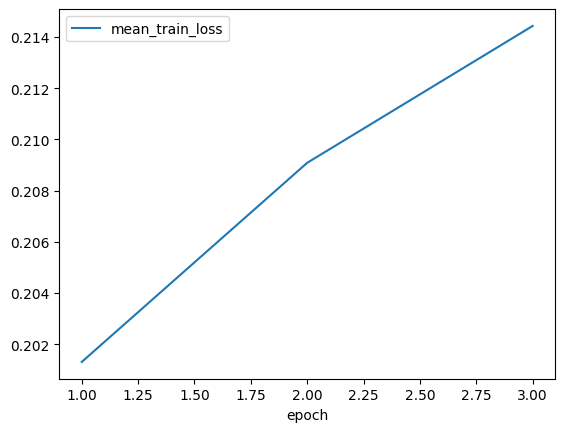

In [57]:
df_info.plot.line(x='epoch', y='mean_train_loss')

These statistics should help you evaluate how the model was doing during training and how it converged over time.

Once again we can also generate and visualize the molecules from the final saved model:

In [68]:
reinforced = GraphTransformer(voc_trg=vocabulary, use_gpus=GPUS)
reinforced.loadStatesFromFile(f'{MODELS_RL_PATH}/agent.pkg')

generated = reinforced.sample_smiles(inputs, num_samples=30)

smilesToGrid(generated.SMILES)

Standardizing molecules (batch processing):   0%|          | 0/1 [00:00<?, ?it/s]

Creating fragment-molecule pairs (batch processing):   0%|          | 0/1 [00:00<?, ?it/s]

Encoding fragment-molecule pairs. (batch processing):   0%|          | 0/1 [00:00<?, ?it/s]

Generating molecules:   0%|          | 0/30 [00:00<?, ?it/s]

MolGridWidget()